# Principal component analysis

**Principal component analysis (PCA)** aims to determine the importance of dimensions in data and build up a new basis. In this new basis, directions are selected to have the most independence from others. Because of maximal independence, we can understand which data dimensions carry more information and which carry less. PCA is used in many applications, primarily in data analysis and data compression, but also it can be used in computer vision; for example, to determine and track the orientation of an object. This recipe will show you how to do it in OpenCV.

The main idea of tracking object orientation using PCA is that the object doesn't change during rotation. Because it's the same object in different orientations, it has its own basis and this basis rotates together with the object. So, we need to determine this basis in each moment to find an object's orientation. PCA is able to find such basis if we have the right data to analyze. Let's use the points of an object's contours. Of course, they change their absolute position during rotation, but they rotate together with the object. At each orientation, there are directions along which the points of the contours vary the most. And because rotation doesn't skew or distort the contours, these directions are revolved with the object.

`cv2.PCACompute` implements PCA, as the name suggests. It finds eigenvectors and eigenvalues of the data covariance matrix. There are two overloads of this function. The first option, which we use in the preceding code, accepts a matrix of data to analyze, a precomputed mean value, a matrix to write computed eigenvectors, and a number of vectors to return. The last two arguments are optional, and can be omitted (in this case, all vectors are returned). Also, if there is no precomputed mean value, the second parameter can be set to None. In this case, the function computes the mean value as well. The data matrix is usually a set of samples. Each sample has a number of dimensions, $D$, and there are $N$ samples overall. In this case, the data matrix has to be $N\times D$, and so has N rows, and each row is an individual sample.

As said before, there is a second overload of `cv2.PCACompute`. As previously, it accepts a matrix of data to analyze and a precomputed mean value as the first two arguments. The third and fourth parameters are the ratio of retained variance and the object to store the computed vectors. The ratio determines the number of vectors to return by their variance, the more unbalanced the ratio, the greater the number of retained vectors. This parameter allows you to not fix the number of vectors, but to preserve only the ones with the highest variance.

In [1]:
# Import all of the necessary modules
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2,start_3=0, end_3=5):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        if shapes[2] < end_3:
            end_3 = shapes[2]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", sep='',end="")
            for j in range (start_Second,end_Second):
                print(np_arr[i,j,start_3:end_3], sep=' ', end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            #print(np_arr[i,start_Second:end_Second],sep=' ',end=" ") cutoff sting by<60
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
def plt_view_image(plt,list_images,figsize=(15,6), axis="off", cmap='gray'):
    #%pylab inline
    plt.figure(figsize=figsize)
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis(axis)
        plt.title(name)
        if cmap =='gray':
            plt.imshow(img,cmap='gray' )
        else:
            plt.imshow(img )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
print("current folder ==",os.getcwd())
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S06\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s06\env

d:\html_doc\program\opencv\packt\s06\env\lib\site-packages
d:\html_doc\program\opencv\packt\s06\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s06\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s06\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s06\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s06\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython
current folder == D:\HTML_DOC\Program\opencv\Packt\S06\env


In [2]:
def contours_pca(contours):
    # join all contours points into the single matrix and remove unit dimensions
    cnt_pts = np.vstack(contours).squeeze().astype(np.float32)
    mean, eigvec = cv2.PCACompute(cnt_pts, None)

    center = mean.squeeze().astype(np.int32)
    delta = (150*eigvec).astype(np.int32)
    return center, delta

########################################################
#def draw_pca_results(image, contours, center, delta):
#    cv2.drawContours(image, contours, -1, (255, 255, 0))
#    cv2.line(image, tuple((center+delta[0])), tuple((center-delta[0])), (0,255,0), 2)
#    cv2.line(image, tuple((center+delta[1])), tuple((center-delta[1])), (0,0,255), 2)
#    cv2.circle(image, tuple(center), 20, (0, 255, 255), 2)

In [3]:
capture = cv2.VideoCapture("../data/opencv_logo.mp4")

print(capture.isOpened())
print('Created capture:', '../data/shuttle.mp4')
print('Frame count:', int(capture.get(cv2.CAP_PROP_FRAME_COUNT)))
print('Frame width:', int(capture.get(cv2.CAP_PROP_FRAME_WIDTH)))
print('Frame height:', int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('Frame rate:', capture.get(cv2.CAP_PROP_FPS))

print('Frame width:   resize*0.5 =', int(capture.get(cv2.CAP_PROP_FRAME_WIDTH)*0.5 ))
print('Frame height:  resize*0.5 =', int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT)*0.5))


image_frames = []
c = 0

while True:
    status_cap, frame = capture.read()
    if not status_cap:
        break
    
    frame = cv2.resize(frame, (0, 0), frame, 0.5, 0.5)
    edges = cv2.Canny(frame, 250, 150)
    
    contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours):
        center, delta = contours_pca(contours)  
        #draw_pca_results(frame, contours, center, delta)
        cv2.drawContours(frame, contours, -1, (255, 255, 0),4)
        cv2.line(frame, tuple((center+delta[0])), tuple((center-delta[0])), (0,255,0), 2)
        cv2.line(frame, tuple((center+delta[1])), tuple((center-delta[1])), (0,0,255), 2)
        cv2.circle(frame, tuple(center), 20, (0, 255, 255), 2)
        
        pxstep = 100
        x = pxstep
        y = pxstep
        #Draw all x lines
        while x < frame.shape[1]:
            cv2.line(frame, (x, 0), (x, frame.shape[0]), color=(255, 0, 255), thickness=1)
            x += pxstep
        #Draw all y lines
        while y < frame.shape[0]:
            cv2.line(frame, (0, y), (frame.shape[1], y), color=(255, 0, 255),thickness=1)
            y += pxstep
        cv2.putText(frame,'center: {0}'.format(center),(10,25),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,255),2)
        cv2.putText(frame,'delta[0]:{0}'.format(delta[0]),(10,63),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        cv2.putText(frame,'delta[1]:{0}'.format(delta[1]),(10,99),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
    cv2.imshow('PCA', frame)
    
    c += 1
    if c % 15 == 0 or c ==1:
        image_frames.append(["frame:{0}".format(c),frame[:,:,[2,1,0]]])
        #print("current frame ==",current_frame, output.shape)

    if cv2.waitKey(100) == 27:
        break

cv2.destroyAllWindows()

True
Created capture: ../data/shuttle.mp4
Frame count: 157
Frame width: 1920
Frame height: 1080
Frame rate: 17.19111950322166
Frame width:   resize*0.5 = 960
Frame height:  resize*0.5 = 540


len(res10_300x300_ssd_iter_140000) == 11
0 1


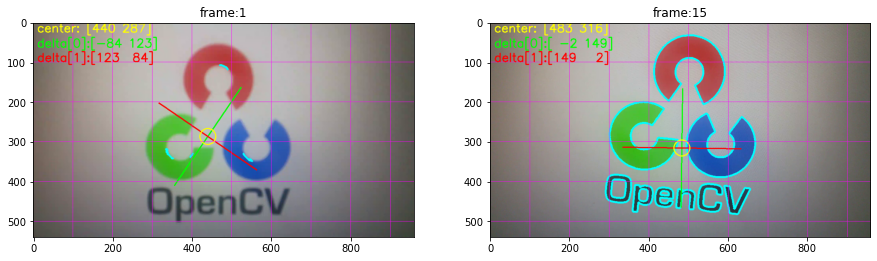

2 3


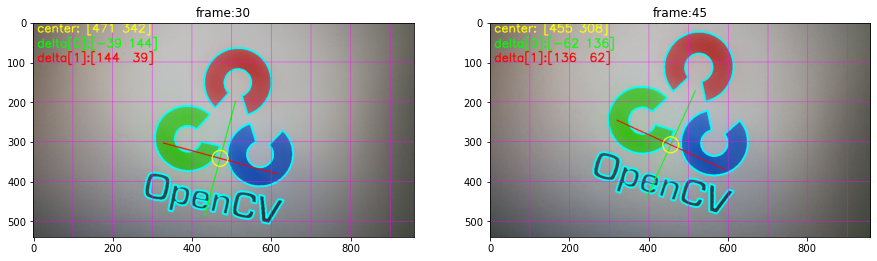

4 5


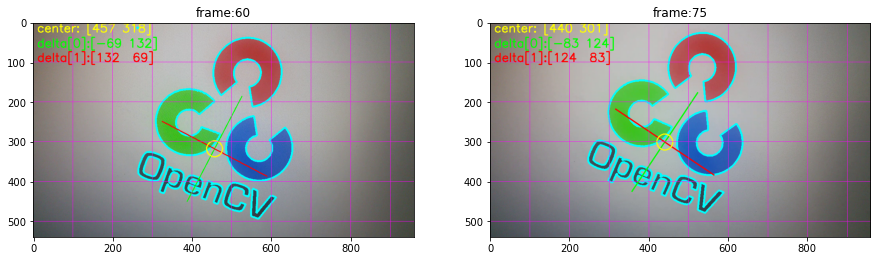

6 7


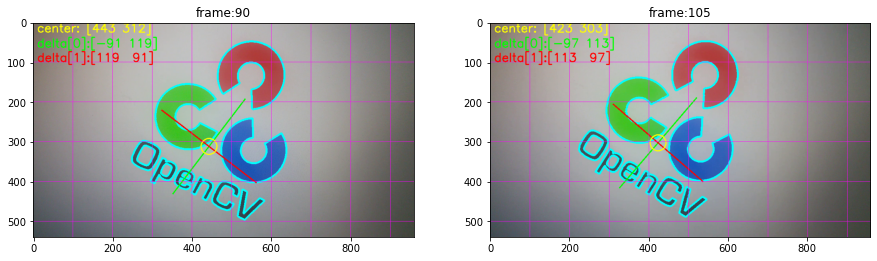

8 9


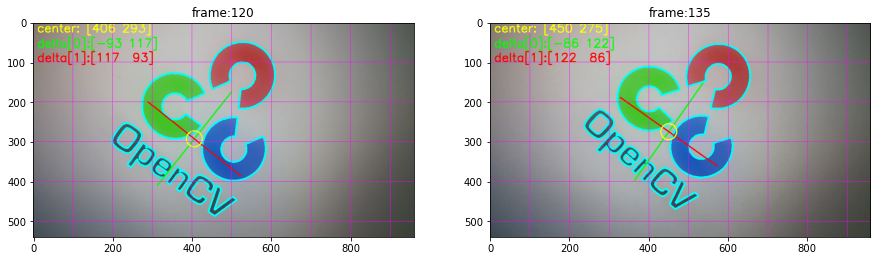

10 11


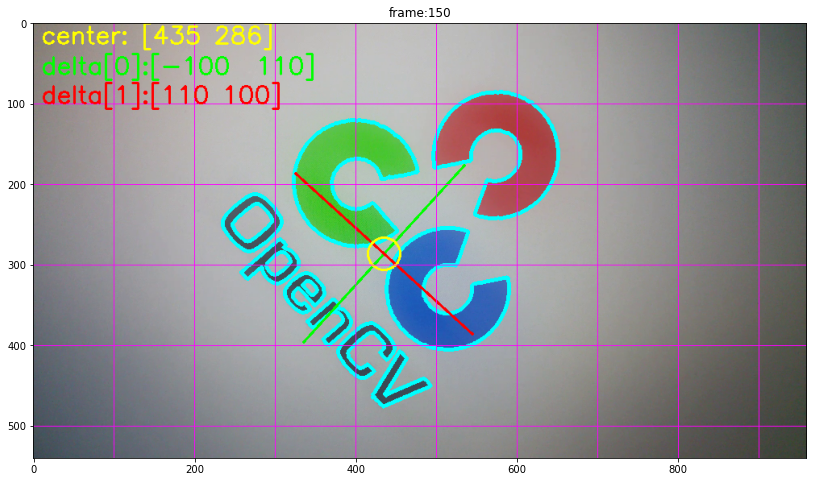

In [4]:
#########################################################
print("len(res10_300x300_ssd_iter_140000) ==", len(image_frames))
k =2
for i in range(0,len(image_frames),k):
    print(i,i+k-1)
    plt_view_image(plt,image_frames[i:i+k], figsize=(15,8), axis='on', cmap='gray')